In [2]:
from sqlalchemy import create_engine
import pymysql

db_connection_str = 'mysql+pymysql://<your_account>:<your_password>@<your_ip>/ML_data'
db_connection = create_engine(db_connection_str)

df = pd.read_sql('SELECT * FROM datas', con=db_connection)
df = df.set_index('player_name')

df.tail(2)

,player_name,position,age,height,weight,rating,value,follower,shots_total,shots_on,...,penalty_commited,penalty_success,penalty_missed,penalty_saved,games_appearences,games_lineups,substitutes_in,substitutes_out,substitutes_bench,games_played
370,Y. Poulsen,4.0,26.0,192.0,84.0,6.54545,24.0,109000,2.0141,0.7524,...,0.0,0.0116,0.0,0.0,1.4006,0.9492,0.4514,0.2894,0.5788,86.3889
371,Y. Tielemans,2.0,23.0,176.0,72.0,4.38462,44.0,282254,1.6977,0.6011,...,0.0,0.0105,0.0,0.0,1.2021,1.0334,0.1687,0.3058,0.2636,94.8333


In [3]:
pd.options.display.max_columns = len(df.columns)

In [5]:
df_nofollower = df.drop(columns=['follower'])

###### follower X

In [35]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

z = 10
cVal = list(range(25, 200, 5))
scores_rm = np.zeros([len(cVal), 3, z])
num = 0
mseListNf = []

cv = KFold(z, shuffle=True, random_state=0)
for c in cVal:
    for i, (idx_train, idx_test) in enumerate(cv.split(df_nofollower)):
        
        df_train = df_nofollower.iloc[idx_train]
        df_test = df_nofollower.iloc[idx_test]

        X_train = df_train.drop('value', axis=1).astype(float)
        X_train = StandardScaler().fit_transform(X_train)
        y_train = df_train['value']

        model = SVR(kernel="rbf", C=c)
        result = model.fit(X_train, y_train)


        pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
        rsquared = r2_score(df_test.value, pred)
        mse = mean_squared_error(df_test.value, pred)
        
        scores_rm[num, 0, i] = rsquared
        scores_rm[num, 1, i] = mse
        scores_rm[num, 2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

#         print("R2 = {:.8f}".format(rsquared))
#         print("R2 Score = {:.8f}".format(scores_rm[2, i]))
#         print("mse = {:.8f}".format(mse))

    print("C : {} | 모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(c, scores_rm[num, 0].mean(), scores_rm[num, 2].mean(), scores_rm[num, 1].mean()))
    mseListNf.append(scores_rm[num, 1].mean())
    num += 1

C : 25 | 모델 성능 : Metrics R2 = 0.21188564256843515, R2 Score = -0.025311679858706203, mse = 363.7421982771533
C : 30 | 모델 성능 : Metrics R2 = 0.21281260001029353, R2 Score = -0.026653550263462757, mse = 360.1202409293146
C : 35 | 모델 성능 : Metrics R2 = 0.2105824664321178, R2 Score = -0.028751244852347646, mse = 358.38548842124476
C : 40 | 모델 성능 : Metrics R2 = 0.20695945371456897, R2 Score = -0.03333552753326331, mse = 357.9595886416969
C : 45 | 모델 성능 : Metrics R2 = 0.20315090316614892, R2 Score = -0.03906036527294965, mse = 357.81915525629347
C : 50 | 모델 성능 : Metrics R2 = 0.19776180432785465, R2 Score = -0.04526764468149774, mse = 358.2623755611668
C : 55 | 모델 성능 : Metrics R2 = 0.1900688309266746, R2 Score = -0.05174689166306286, mse = 359.64893836313047
C : 60 | 모델 성능 : Metrics R2 = 0.18141850547330493, R2 Score = -0.05665177023115218, mse = 361.26452920245293
C : 65 | 모델 성능 : Metrics R2 = 0.1722531701693343, R2 Score = -0.061761547558784845, mse = 363.12531917033186
C : 70 | 모델 성능 : Metri

###### follower O

In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

z = 10
cVal = list(range(25, 200, 5))
scores_rm = np.zeros([len(cVal), 3, z])
num = 0
mseList = []

cv = KFold(z, shuffle=True, random_state=0)
for c in cVal:
    for i, (idx_train, idx_test) in enumerate(cv.split(df)):
        
        df_train = df.iloc[idx_train]
        df_test = df.iloc[idx_test]

        X_train = df_train.drop('value', axis=1).astype(float)
        X_train = StandardScaler().fit_transform(X_train)
        y_train = df_train['value']

        model = SVR(kernel="rbf", C=c)
        result = model.fit(X_train, y_train)


        pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
        rsquared = r2_score(df_test.value, pred)
        mse = mean_squared_error(df_test.value, pred)
        
        scores_rm[num, 0, i] = rsquared
        scores_rm[num, 1, i] = mse
        scores_rm[num, 2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

    #     print("R2 = {:.8f}".format(rsquared))
    #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    #     print("mse = {:.8f}".format(mse))

    print("C : {} | 모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(c, scores_rm[num, 0].mean(), scores_rm[num, 2].mean(), scores_rm[num, 1].mean()))
    mseList.append(scores_rm[num, 1].mean())
    num += 1

C : 25 | 모델 성능 : Metrics R2 = 0.26587555680180663, R2 Score = -0.0269792209103052, mse = 341.0936651210733
C : 30 | 모델 성능 : Metrics R2 = 0.26650492851201146, R2 Score = -0.03394557297683846, mse = 337.5282295507243
C : 35 | 모델 성능 : Metrics R2 = 0.265911304060647, R2 Score = -0.04159893744913579, mse = 334.8104455111056
C : 40 | 모델 성능 : Metrics R2 = 0.2633923508683554, R2 Score = -0.05131528186050953, mse = 333.2206821969524
C : 45 | 모델 성능 : Metrics R2 = 0.2588594050659346, R2 Score = -0.06253960228050646, mse = 332.61972747347613
C : 50 | 모델 성능 : Metrics R2 = 0.25220827184031813, R2 Score = -0.07409305374847952, mse = 333.2845564324345
C : 55 | 모델 성능 : Metrics R2 = 0.24302863979869627, R2 Score = -0.08661523277190722, mse = 335.0498136392549
C : 60 | 모델 성능 : Metrics R2 = 0.23361962928082697, R2 Score = -0.09595932208731234, mse = 336.9168493188703
C : 65 | 모델 성능 : Metrics R2 = 0.22384817202014134, R2 Score = -0.10493073885699804, mse = 338.9052204498897
C : 70 | 모델 성능 : Metrics R2 = 0.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


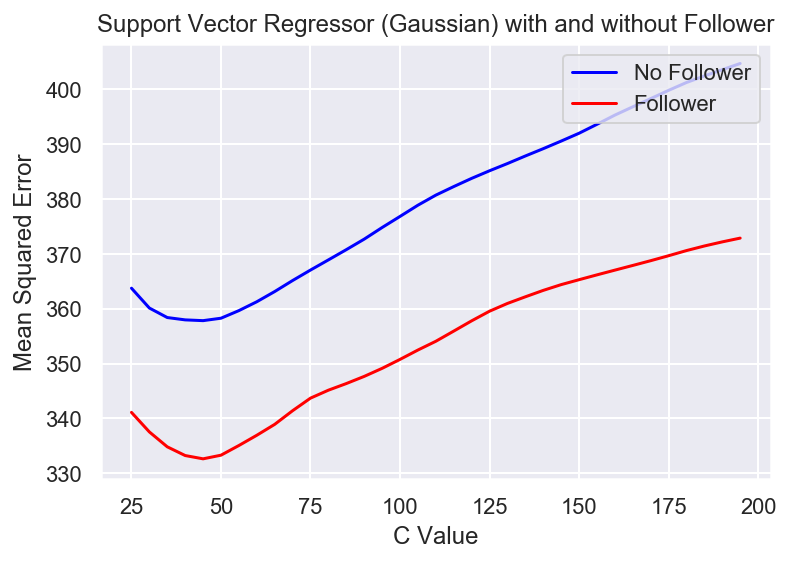

In [10]:
cVal = list(range(25, 200, 5))
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(cVal, mseListNf, color='blue', label='No Follower')
ax.plot(cVal, mseList, color='red', label='Follower')
plt.legend(loc='upper right')
plt.title('Support Vector Regressor (Gaussian) with and without Follower')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.draw()

In [30]:
mseListNf

[363.7421982771533,
 360.1202409293146,
 358.38548842124476,
 357.9595886416969,
 357.81915525629347,
 358.2623755611668,
 359.64893836313047,
 361.26452920245293,
 363.12531917033186,
 365.13475392129806,
 367.0459596350887,
 368.89812080054764,
 370.7654483251106,
 372.684253116995,
 374.8019366206286,
 376.82438364441856,
 378.87222988877505,
 380.7083115071844,
 382.2676083411285,
 383.7633205405867,
 385.1507632931375,
 386.46819689084447,
 387.8464973816496,
 389.1802972429708,
 390.5649939035714,
 391.99213013251915,
 393.62406926637067,
 395.30021073354436,
 396.8126500663177,
 398.3041287458147,
 399.8127506655047,
 401.2462512729748,
 402.4418414360401,
 403.5827807404972,
 404.71467182709966]

In [31]:
mseList

[341.0936651210733,
 337.5282295507243,
 334.8104455111056,
 333.2206821969524,
 332.61972747347613,
 333.2845564324345,
 335.0498136392549,
 336.9168493188703,
 338.9052204498897,
 341.3947380187449,
 343.68891594516043,
 345.1385285637532,
 346.3468594100009,
 347.6529963100351,
 349.12056855088457,
 350.7520763506197,
 352.46037895917937,
 354.05660031581584,
 355.91292827584846,
 357.78485190863705,
 359.541776610815,
 360.9581555345584,
 362.167032748653,
 363.3380099668551,
 364.387041418334,
 365.28618149307806,
 366.16748728342645,
 367.0304667206917,
 367.88497974092815,
 368.7516804102432,
 369.6562221772561,
 370.5967995488083,
 371.4341137787204,
 372.18366793709015,
 372.870039548843]